<a href="https://colab.research.google.com/github/SaiRupan/OIBSIP-DataScience-Intern-Tasks/blob/main/OIBSIP_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OASISINFOBYTE
##Data Science Internship

Name:Thirunahari Sai Rupan

Task-3:SALES PREDICTION USING PYTHON

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing the dataset
sales_data=pd.read_csv("Advertising.csv")
sales_data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<Axes: xlabel='TV', ylabel='Sales'>

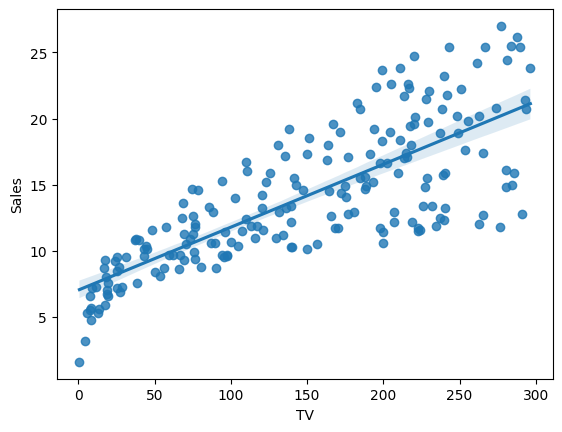

In [ ]:
sns.regplot(x="TV" , y="Sales", data=sales_data)

<Axes: xlabel='Radio', ylabel='Sales'>

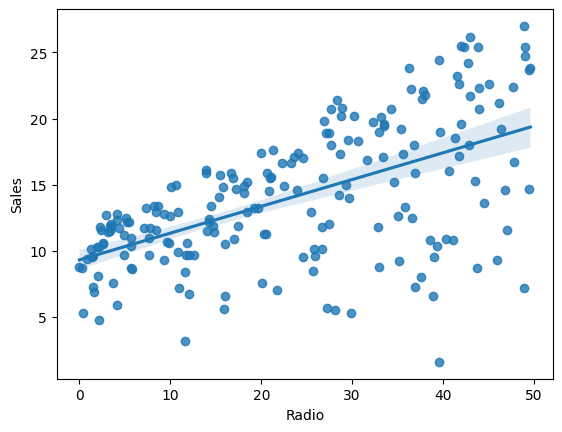

In [ ]:
sns.regplot(x="Radio" , y="Sales", data=sales_data)

<Axes: xlabel='Newspaper', ylabel='Sales'>

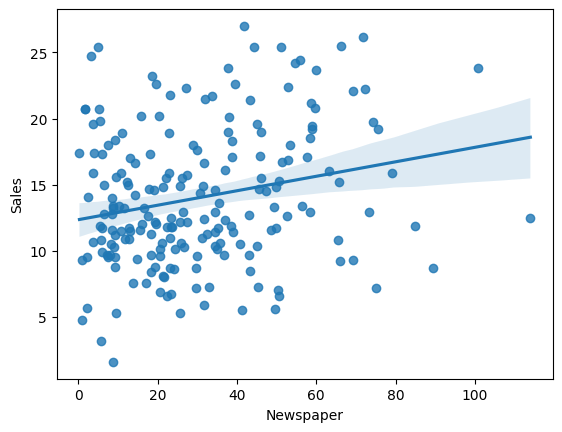

In [ ]:
sns.regplot(x="Newspaper" , y="Sales", data=sales_data)

##Visualization

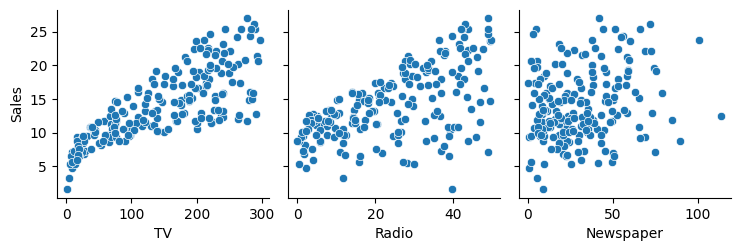

In [ ]:
sns.pairplot(data=sales_data,x_vars=['TV','Radio','Newspaper'],y_vars='Sales')

In [ ]:
sales_data.corr()

,Unnamed: 0,TV,Radio,Newspaper,Sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
Radio,-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
Sales,-0.051616,0.782224,0.576223,0.228299,1.000000


<Axes: >

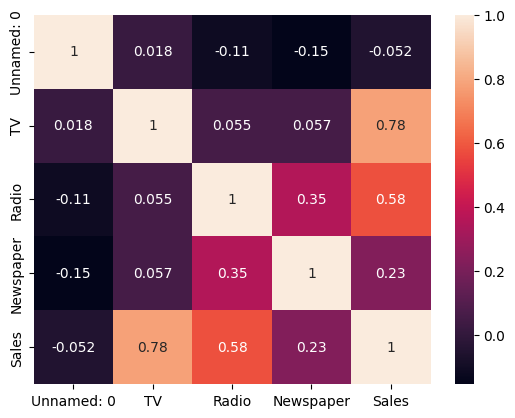

In [ ]:
sns.heatmap(sales_data.corr(), annot=True)

##Building the Linear Regression Model


In [ ]:
import statsmodels
import statsmodels.api as sm
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=sales_data["TV"]
y=sales_data["Sales"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.70 , random_state=100)

In [ ]:
X_train.shape

(140,)

In [ ]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [ ]:
# fitting Model
#first create an onject of class OLS ordinary Least Square.
lr = sm.OLS(y_train, X_train_sm)
#fitting object
lr_model = lr.fit()
#printing parameters
lr_model.params

const    6.989666
TV       0.046497
dtype: float64

In [ ]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           2.84e-30
Time:                        17:59:02   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.000       5.907       8.073
TV             0.0465      0.003     14.798      0.000       0.040       0.053
==============================================================================
Omnibus:                        0.995   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.608   Jarque-Bera (JB):                0.970
Skew:                          -0.008   Prob(JB):                        0.616
Kurtosis:                       2.593   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

74     16.912202
3      14.034016
185    16.521624
26     13.634138
90     13.234261
         ...    
87     12.136923
103    15.726520
67     13.466748
24      9.886451
8       7.389543
Length: 140, dtype: float64

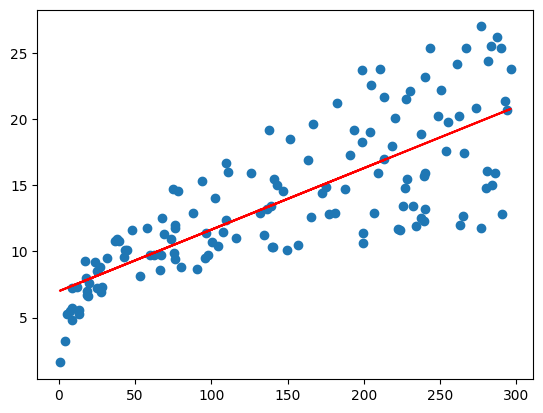

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred , 'r')
plt.show()

<Figure size 640x480 with 0 Axes>

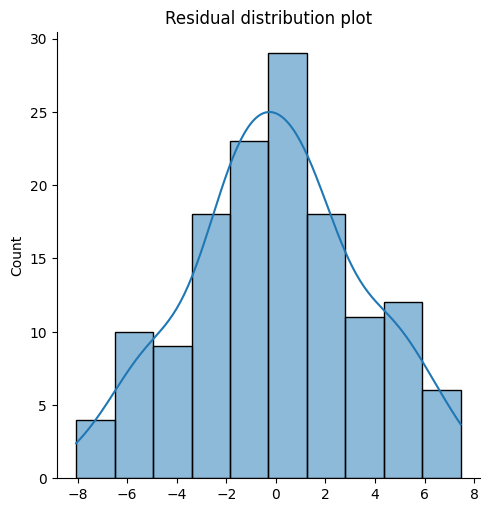

In [ ]:
res = y_train - y_train_pred
plt.figure()
sns.displot(res, kde=True)
plt.title("Residual distribution plot")
plt.show()

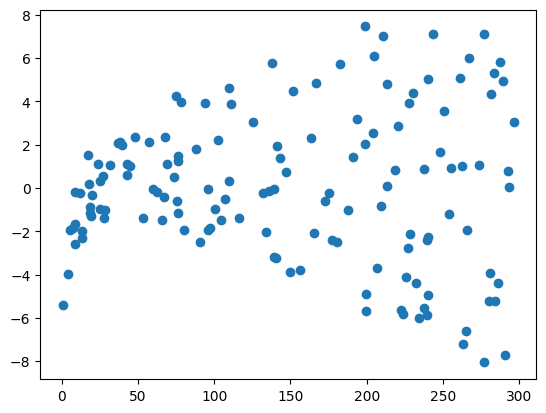

In [ ]:
plt.scatter(X_train, res)
plt.show()

In [ ]:
# add a contsnt/intercept to test
X_test_sm = sm.add_constant(X_test)
# Pred on test
y_test_pred = lr_model.predict(X_test_sm)

In [ ]:
# Evaluate the model , R-squared, and other statistics on the test
# to do this we need some libraries , that are
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# R-squared
r_square = r2_score(y_true = y_test , y_pred = y_test_pred)
r_square

0.5942987267783303

In [ ]:
r_square_train = r2_score(y_true = y_train , y_pred = y_train_pred)
r_square_train

0.6134312469429993

In [ ]:
# mean_squared_error
mean_squared_error(y_true = y_test , y_pred = y_test_pred)

7.9757985328548475

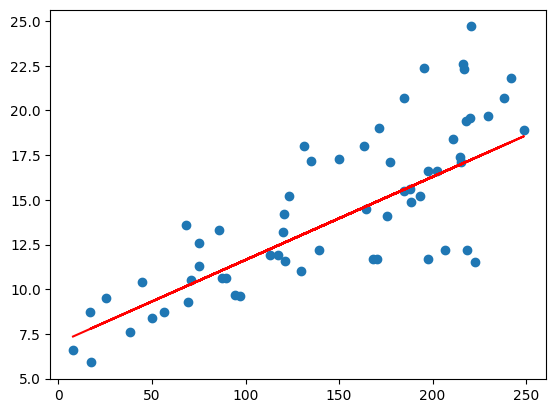

In [ ]:
# ploting test
plt.scatter(X_test , y_test)
plt.plot(X_test , y_test_pred , 'r')
plt.show()